# Weight of Evidence & Information Value

References

- https://documentation.sas.com/doc/en/vdmmlcdc/8.1/casstat/viyastat_binning_details02.htm
- https://mightypy.readthedocs.io/
- https://www.listendata.com/2015/03/weight-of-evidence-woe-and-information.html

Weight of evidence

- Generally measure of separation
- measure how much evidence supports or undermines the hypothesis


The information value (IV) is a weighted sum of the WOE of the characteristic’s attributes. The weight is the difference between the conditional probability of an attribute for an event and the conditional probability of that attribute for a nonevent.

\begin{align*}
    \text{Weight of Evidence} &= \ln{(\frac{\text{% of non-event}}{\text{% of event}})} = \ln{\frac{\text{% of y = 0}}{\text{% of y = 1}}}\\
    \\
    \text{Information Value} &= \sum{(\text{% of non-event} - \text{% of event})} * \text{WOE}
\end{align*}


| Information Value |	Variable Predictiveness |
|--|--|
| Less than 0.02 |	Not useful for prediction |
| 0.02 to 0.1 |	Weak predictive Power |
| 0.1 to 0.3  |	Medium predictive Power |
| 0.3 to 0.5  |	Strong predictive Power |
| >0.5 |	Suspicious Predictive Power |

In [1]:
from sklearn.datasets import load_breast_cancer
from mightypy.stats import WOE_IV
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
dataset = load_breast_cancer(as_frame=True)

df = dataset.frame
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [3]:
target_map = {0: 'False', 1: 'True'}

df.insert(loc=df.shape[1], column='label', value=df['target'].map(target_map))

In [9]:
woe_iv_obj = WOE_IV(event='True', non_event='False', target_col='label',bucket_col='mean smoothness')

In [10]:
woe, iv = woe_iv_obj.values(df)

In [11]:
woe

label,False,True,adj_event,adj_non_event,%_event_True,%_non_event_False,woe,iv
buckets_mean smoothness,,,,,,,,
"(0.0516, 0.0797]",3,54,54,3,0.151261,0.014151,-2.369222,0.324843
"(0.0797, 0.0842]",10,47,47,10,0.131653,0.047170,-1.026413,0.086714
"(0.0842, 0.0879]",9,48,48,9,0.134454,0.042453,-1.152827,0.106061
"(0.0879, 0.0918]",21,36,36,21,0.100840,0.099057,-0.017847,0.000032
"(0.0918, 0.0959]",22,35,35,22,0.098039,0.103774,0.056844,0.000326
"(0.0959, 0.0993]",23,33,33,23,0.092437,0.108491,0.160136,0.002571
"(0.0993, 0.103]",25,32,32,25,0.089636,0.117925,0.274289,0.007759
"(0.103, 0.108]",30,30,30,30,0.084034,0.141509,0.521150,0.029953
"(0.108, 0.115]",32,22,22,32,0.061625,0.150943,0.895843,0.080016


In [12]:
iv

0.7729378109850594

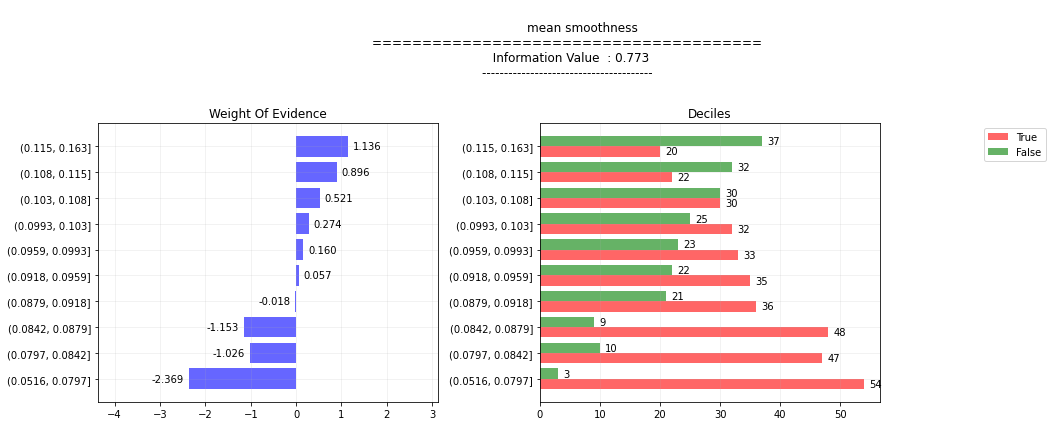

In [13]:
fig = woe_iv_obj.plot(figsize=(15,6))
fig.tight_layout();